In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv ('study1_all.csv')
data

,Number\n,Age\n(Years),Height \n(m),Weight\n(kg),BMI\n(kg/m^2),Waist circumference \n(cm),Systolic Blood Pressure at rest (mmHg),Diastolic Blood Pressure at rest (mmHg),Heart rate at rest\n(bpm),Body fat %,...,VT1 RER,VT2 FATox,VT2 CHOox,VT2 RER,VO2MAX \nFATox,VO2MAX\nCHOox,VO2MAX\nRER,PFO \n(g/min),PCHOox \n(g/min),PEAK\nRER
0,1.0,23.73,1.90,76.1,21.00,82.0,160.0,82.0,55.0,12.8,...,NaN,0.00,3.94,1.02,0.00,3.06,1.16,0.95,5.59,1.19
1,5.0,27.62,1.75,68.8,22.00,80.0,126.0,75.0,66.0,13.7,...,NaN,0.00,2.82,1.10,0.00,1.39,1.27,0.48,3.41,1.30
2,7.0,24.39,1.73,81.0,27.00,83.0,131.0,71.0,74.0,11.4,...,NaN,0.00,3.00,1.00,0.00,2.00,1.20,0.70,5.00,1.30
3,8.0,22.87,1.82,77.8,24.00,82.0,139.0,78.0,56.0,17.4,...,NaN,0.00,2.94,1.06,0.00,2.68,1.14,0.54,4.75,1.18
4,9.0,23.92,1.75,72.7,23.60,63.0,119.0,63.0,71.0,18.1,...,NaN,0.00,1.57,1.19,0.00,0.58,1.35,0.36,2.63,1.45
5,10.0,23.68,1.66,77.5,28.00,93.0,133.0,83.0,69.0,27.8,...,0.93,0.07,3.37,0.98,0.00,2.74,1.14,0.58,4.00,1.25
6,15.0,24.28,1.85,87.6,25.71,90.0,114.0,60.0,49.0,20.7,...,0.81,0.90,7.90,0.88,0.00,6.00,1.06,2.18,11.72,1.09
7,1001.0,25.00,1.78,65.0,20.52,73.0,121.0,82.0,37.0,7.6,...,0.79,0.05,3.48,0.99,0.05,2.02,1.24,0.91,4.86,1.30
8,1015.0,20.00,1.82,69.0,20.83,76.0,110.0,74.0,52.0,17.9,...,0.90,0.00,2.03,1.20,0.00,2.75,1.14,0.41,3.95,1.54
9,1018.0,18.00,1.82,84.9,25.63,83.0,114.0,75.0,57.0,17.3,...,0.72,0.00,3.58,1.06,0.00,2.78,1.17,0.92,4.91,1.34


In [3]:
data.columns

Index(['Number\n', 'Age\n(Years)', 'Height \n(m)', 'Weight\n(kg)',
       'BMI\n(kg/m^2)', 'Waist circumference \n(cm)',
       'Systolic Blood Pressure at rest (mmHg)',
       'Diastolic Blood Pressure at rest (mmHg)', 'Heart rate at rest\n(bpm)',
       'Body fat %', 'Skeletal muscle mass\n(kg)',
       'Skeletal Muscle Mass Index\n(kg/m^2)', 'Visceral fat\n(Litres) ',
       'Resting metabolic rate (kcal/day)', 'RQ', '%  Fat', '% Carbohydrate',
       'Hand grip strength - dominant\n(kg)',
       'Normative Percentiles \n(Wang et al., 2019)',
       'Hand grip strength - non-dominant\n(kg)',
       'Hand grip strength -  Combined Score\n(kg)',
       'Normative Percentiles (Hoffmann et al., 2019)', 'Back strength\n(kg)',
       'Back strength/kg', 'Absolute\nVO2 max\n(L/min)',
       'Relative\nVO2 max\n(mL/kg/min)', 'VO2 max/\nSMM\n(mL/kg/min)',
       'Max Aerobic\nPower \n(Watts)', 'MAP/BW (W/kg)', 'MAP/SMM (W/kg)',
       'Normative Percentiles\n(Kaminsky et al., 2017)',
       

In [4]:
data1 = data.copy()
data1 = data[['Absolute\nVO2 max\n(L/min)',
       'Relative\nVO2 max\n(mL/kg/min)', 'VO2 max/\nSMM\n(mL/kg/min)',
       'Max Aerobic\nPower \n(Watts)', 'MAP/BW (W/kg)', 'MAP/SMM (W/kg)',
       'Normative Percentiles\n(Kaminsky et al., 2017)',
       'Ventilatory threshold 2\n(mL/kg/min)', 'VT2/SMM\n(mL/kg/min)', 'Functional Threshold Power\n(Watts)',
       'FTP/BW\n(W/kg)', 'FTP/SMM\n(W/kg)','PFO \n(g/min)', 'PCHOox \n(g/min)']]
data1

,Absolute\nVO2 max\n(L/min),Relative\nVO2 max\n(mL/kg/min),VO2 max/\nSMM\n(mL/kg/min),Max Aerobic\nPower \n(Watts),MAP/BW (W/kg),MAP/SMM (W/kg),"Normative Percentiles\n(Kaminsky et al., 2017)",Ventilatory threshold 2\n(mL/kg/min),VT2/SMM\n(mL/kg/min),Functional Threshold Power\n(Watts),FTP/BW\n(W/kg),FTP/SMM\n(W/kg),PFO \n(g/min),PCHOox \n(g/min)
0,3.65,48.00,108.07,280.0,3.68,8.28,70.0,41.0,92.31,221.0,2.90,6.54,0.95,5.59
1,2.89,42.00,96.00,210.0,3.05,6.98,50.0,41.0,93.71,185.0,2.69,6.15,0.48,3.41
2,4.13,51.00,114.43,300.0,3.70,8.31,75.0,42.0,94.24,255.0,3.15,7.06,0.70,5.00
3,3.03,39.00,90.04,230.0,2.96,6.82,40.0,31.0,71.57,170.0,2.19,5.04,0.54,4.75
4,2.76,38.00,89.12,210.0,2.89,6.77,35.0,29.0,68.01,156.0,2.15,5.03,0.36,2.63
5,3.02,39.00,106.43,215.0,2.77,7.57,40.0,31.0,84.60,166.0,2.14,5.85,0.58,4.00
6,5.17,59.00,149.81,420.0,4.79,12.17,95.0,53.0,134.57,339.0,3.87,9.83,2.18,11.72
7,3.58,55.08,124.74,290.0,4.46,10.10,85.0,39.0,88.33,250.0,3.85,8.71,0.91,4.86
8,3.10,44.93,113.55,250.0,3.62,9.16,60.0,42.0,106.15,190.0,2.75,6.96,0.41,3.95
9,3.60,42.40,101.41,240.0,2.83,6.76,50.0,37.0,88.49,220.0,2.59,6.20,0.92,4.91


In [5]:
from sklearn import preprocessing
data_scaled = preprocessing.scale(data1)
data_scaled = pd.DataFrame(data_scaled[:,:], columns=data1.columns)
data_scaled

,Absolute\nVO2 max\n(L/min),Relative\nVO2 max\n(mL/kg/min),VO2 max/\nSMM\n(mL/kg/min),Max Aerobic\nPower \n(Watts),MAP/BW (W/kg),MAP/SMM (W/kg),"Normative Percentiles\n(Kaminsky et al., 2017)",Ventilatory threshold 2\n(mL/kg/min),VT2/SMM\n(mL/kg/min),Functional Threshold Power\n(Watts),FTP/BW\n(W/kg),FTP/SMM\n(W/kg),PFO \n(g/min),PCHOox \n(g/min)
0,0.467413,0.738509,0.173313,0.670844,0.867272,0.358128,0.7697,0.874322,0.418347,0.535388,0.675333,0.252160,0.716276,0.506352
1,-0.706915,-0.148208,-0.636375,-0.806520,-0.272719,-0.722790,-0.2327,0.874322,0.509570,-0.281058,0.276242,-0.076823,-0.640011,-0.807753
2,1.209094,1.181867,0.599959,1.092948,0.903462,0.383073,1.0203,1.020914,0.544105,1.306476,1.150441,0.690805,-0.005153,0.150700
3,-0.490591,-0.591567,-1.036188,-0.384416,-0.435575,-0.855826,-0.7339,-0.591607,-0.933060,-0.621245,-0.673975,-1.013161,-0.466868,0.000000
4,-0.907786,-0.739353,-1.097904,-0.806520,-0.562240,-0.897400,-0.9845,-0.884793,-1.165028,-0.938751,-0.749992,-1.021596,-0.986297,-1.277937
5,-0.506043,-0.591567,0.063297,-0.700994,-0.779381,-0.232219,-0.7339,-0.591607,-0.084032,-0.711961,-0.768997,-0.329887,-0.351439,-0.452100
6,2.816070,2.364156,2.973344,3.625571,2.875827,3.592568,2.0227,2.633436,3.171986,3.211518,2.518753,3.027432,4.265707,4.201519
7,0.359252,1.784835,1.291581,0.881896,2.278689,1.871414,1.5215,0.581136,0.159012,1.193081,2.480744,2.082659,0.600847,0.066308
8,-0.382429,0.284805,0.540926,0.037688,0.758701,1.089827,0.2685,1.020914,1.320154,-0.167663,0.390268,0.606450,-0.842011,-0.482240
9,0.390155,-0.089094,-0.273458,-0.173364,-0.670811,-0.905714,-0.2327,0.287950,0.169438,0.512709,0.086198,-0.034646,0.629705,0.096448


In [6]:
wcss =[]

for i in range(1,12):
    kmeans = KMeans(i)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

wcss1 = pd.DataFrame(wcss)
wcss1.to_csv('All Subjects Fitness WCSS.csv')
wcss

[392.00000000000006,
 221.3331008616597,
 127.80437110375189,
 90.66841314189158,
 77.73568992151333,
 68.64823653649405,
 60.7060097500395,
 52.65416376400963,
 45.91914943430278,
 41.45623999725016,
 35.50637737213009]

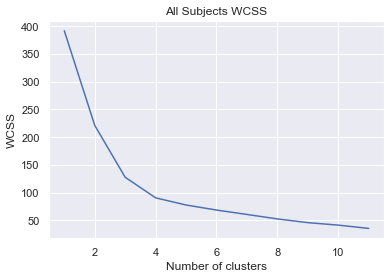

In [7]:
plt.plot(range(1,12),wcss)
plt.title('All Subjects WCSS')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('All Subjetcs WCSS.jpg')

In [8]:
data_scaled_2 = data_scaled.copy()
data_scaled_3 = data_scaled.copy()

In [9]:
clustering_kmeans = KMeans(n_clusters=4, precompute_distances="auto")
data_scaled['clusters'] = clustering_kmeans.fit_predict(data_scaled)
data_scaled['clusters']

C:\Users\filip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


0     1
1     2
2     1
3     0
4     0
5     0
6     3
7     1
8     1
9     2
10    2
11    1
12    2
13    2
14    2
15    1
16    0
17    1
18    2
19    0
20    0
21    0
22    2
23    0
24    2
25    1
26    2
27    0
Name: clusters, dtype: int32

In [10]:
data_scaled['clusters'].to_csv('All Subjects Aerobic Fitness Clusters.csv')

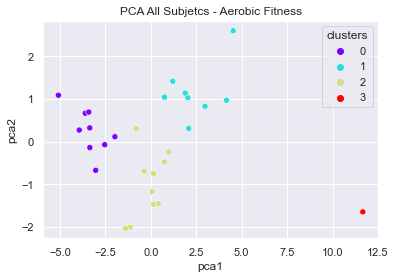

In [11]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(data_scaled)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
results.to_csv('All Subjects Aerobic Fitness PCAs.csv')

sns.scatterplot(x="pca1", y="pca2", palette=('rainbow'), hue=data_scaled['clusters'], data=results)
plt.title('PCA All Subjetcs - Aerobic Fitness')
plt.savefig('All Subjetcs - Aerobic Fitness PCA.jpg')
plt.show()

In [12]:
kmeans_new = KMeans(4)
kmeans_new.fit(data_scaled_2)
clusters_new = data.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(data_scaled_2)

In [13]:
clusters_new

,Number\n,Age\n(Years),Height \n(m),Weight\n(kg),BMI\n(kg/m^2),Waist circumference \n(cm),Systolic Blood Pressure at rest (mmHg),Diastolic Blood Pressure at rest (mmHg),Heart rate at rest\n(bpm),Body fat %,...,VT2 FATox,VT2 CHOox,VT2 RER,VO2MAX \nFATox,VO2MAX\nCHOox,VO2MAX\nRER,PFO \n(g/min),PCHOox \n(g/min),PEAK\nRER,cluster_pred
0,1.0,23.73,1.90,76.1,21.00,82.0,160.0,82.0,55.0,12.8,...,0.00,3.94,1.02,0.00,3.06,1.16,0.95,5.59,1.19,0
1,5.0,27.62,1.75,68.8,22.00,80.0,126.0,75.0,66.0,13.7,...,0.00,2.82,1.10,0.00,1.39,1.27,0.48,3.41,1.30,1
2,7.0,24.39,1.73,81.0,27.00,83.0,131.0,71.0,74.0,11.4,...,0.00,3.00,1.00,0.00,2.00,1.20,0.70,5.00,1.30,0
3,8.0,22.87,1.82,77.8,24.00,82.0,139.0,78.0,56.0,17.4,...,0.00,2.94,1.06,0.00,2.68,1.14,0.54,4.75,1.18,2
4,9.0,23.92,1.75,72.7,23.60,63.0,119.0,63.0,71.0,18.1,...,0.00,1.57,1.19,0.00,0.58,1.35,0.36,2.63,1.45,2
5,10.0,23.68,1.66,77.5,28.00,93.0,133.0,83.0,69.0,27.8,...,0.07,3.37,0.98,0.00,2.74,1.14,0.58,4.00,1.25,1
6,15.0,24.28,1.85,87.6,25.71,90.0,114.0,60.0,49.0,20.7,...,0.90,7.90,0.88,0.00,6.00,1.06,2.18,11.72,1.09,3
7,1001.0,25.00,1.78,65.0,20.52,73.0,121.0,82.0,37.0,7.6,...,0.05,3.48,0.99,0.05,2.02,1.24,0.91,4.86,1.30,0
8,1015.0,20.00,1.82,69.0,20.83,76.0,110.0,74.0,52.0,17.9,...,0.00,2.03,1.20,0.00,2.75,1.14,0.41,3.95,1.54,0
9,1018.0,18.00,1.82,84.9,25.63,83.0,114.0,75.0,57.0,17.3,...,0.00,3.58,1.06,0.00,2.78,1.17,0.92,4.91,1.34,1


In [14]:
clusters_new.to_csv('All Subjects K-Means by VO2max & VT2 (4 clusters).csv')

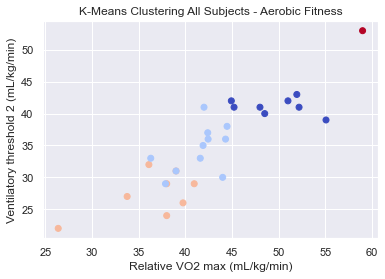

In [15]:
plt.scatter(clusters_new['Relative\nVO2 max\n(mL/kg/min)'],clusters_new['Ventilatory threshold 2\n(mL/kg/min)'], c=clusters_new['cluster_pred'],cmap='coolwarm')
plt.title('K-Means Clustering All Subjects - Aerobic Fitness')
plt.xlabel('Relative VO2 max (mL/kg/min)')
plt.ylabel('Ventilatory threshold 2 (mL/kg/min)')
#add legend with class names
plt.savefig('All Subjetcs K-Means by VO2max & VT2 (4c).jpg')
plt.show()

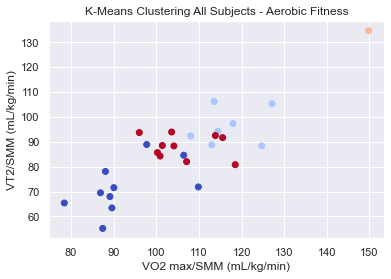

In [16]:
kmeans_new = KMeans(4)
kmeans_new.fit(data_scaled_3)
clusters_new_1 = data.copy()
clusters_new_1['cluster_pred'] = kmeans_new.fit_predict(data_scaled_3)

clusters_new_1.to_csv('All Subjetcs K-Means by VO2max & VT2 relative to SMM (4 clusters).csv')

plt.scatter(clusters_new_1['VO2 max/\nSMM\n(mL/kg/min)'],clusters_new_1['VT2/SMM\n(mL/kg/min)'],c=clusters_new_1['cluster_pred'],cmap='coolwarm')
plt.title('K-Means Clustering All Subjects - Aerobic Fitness')
plt.xlabel('VO2 max/SMM (mL/kg/min)')
plt.ylabel('VT2/SMM (mL/kg/min)')
plt.savefig('All Subjetcs K-Means by VO2max & VT2 relative to SMM (4c).jpg')
plt.show()
